# Assignment 5 - 10/31

## Instructions
* The Assignment # 5 is in class (only)
* Worth 10 points
* The duration is 70 minutes
* You must upload your Jupiter Notebook solution within the class limit (12:30 to 1:45 pm).
* Late submissions are not allowed.

**General Conditions**
* You can **only** talk and discuss with your classmates for the **first 15 minutes**.
* You can access all **your material** (open book)
* You are **not** allowed to use code helper sites like *stackoverflow*, *CodeReview,* etc.
* You are **not** allowed to use *ChatGPT*, *Co-pilot*, or any other *AI*
* You are **not** allowed to transfer files or share code with any other person (directly or indirectly)



## Q1 (2 pts). Run-Length Decoding

Run-Length Decoding is a data compression and decompression technique that is often used to reduce the size of data by encoding consecutive repeated characters or values as a single value followed by a count of how many times it is repeated. It is the reverse process of Run-Length Encoding (RLE), which is used to compress data.

Here's how Run-Length Decoding works:

Given a compressed string or sequence, it consists of pairs of a character or value and a count (e.g., "A3B2C4" means "AAA" followed by "BB" followed by "CCCC").
To decode or decompress the data, you read the compressed data from left to right.
Whenever you encounter a character or value, you append it to the output string the number of times specified by the count that follows.
Continue this process until you have processed the entire compressed data.
Here's an example to illustrate Run-Length Decoding:

Compressed data: "A3B2C4"
Decoded data: "AAABBBCCCC"

In this example, the character "A" is repeated 3 times, "B" is repeated 2 times, and "C" is repeated 4 times, so the decoded data is the expansion of these repetitions.

Run-Length Decoding is often used in situations where data compression is necessary for storage or transmission, and it is especially effective when there are long sequences of repeated values, as it can significantly reduce the amount of data required to represent the same information.

**Sample Input**
> "9A4A2B4C2D"

**Sample Output**
> string = "AAAAAAAAAAAAABBCCCCDD"



In [8]:
def ruLengthDecoding(string):
    prev_char = ''
    new_string = ''
    for char in string:
        if prev_char.isdigit():
            new_string = new_string + char * int(prev_char)
        prev_char = char
    return new_string

print(ruLengthDecoding('9A4A2B4C2D'))
print('AAAAAAAAAAAAABBCCCCDD')

AAAAAAAAAAAAABBCCCCDD
AAAAAAAAAAAAABBCCCCDD


## Q2 (2 pt) Check Brackets consistency (open/close) using one Stack or Queue as data structure.

Using a stack, check if a string has valid open/close brackets.
Valid brackects are [], {}, ().

q2.1. Describe your approach, how to use linked list to implememnt the stack, singly linked list or double linked list, which one and why.

Q2.2 Your code


**Sample Input**

> string1="{[(a+b)*25]+29}"

> string2="(2+{3*4−5}+6)−[7+(8−[9*10])}+[11−{12+(13−14)}]"


**Sample Output**

> with string1 ->True

> with string2 ->False



<div class="alert alert-block alert-info">
<b>Q2.1 Response Here</b>

I chose to use a stack similar to the example we discussed in class. My methodology will be that I will loop over all characters in the input string and each time I run into an left-opened brace I add the corresponding right-opened brace to the stack. Also, if I run into any right handed braces I can check if the brace in the top of the stack matches and if so I pop the item off the stack. Once this process is complete and I have looped through all the characters in the string, then I know the braces are balanced if the stack is empty. My return value checks this criteria and returns True or False.

<div>

In [9]:
## Elements to add in the Stack
class ElementStack:
  def __init__(self, value):
    self.data = value
    self.next = None

#FILO - First In, Last Out
class Stack:

  def __init__(self):
    self.head   = None
    self.__size = 0

  # Overwrite default method for print()
  def __str__(self):
    if self.__size == 0: return 'None'
    cur = self.head
    out = ""
    while cur != None:
        out += f"{cur.data}->"
        cur  = cur.next
    out += "None"
    return out

  # Overwrite default method for len()
  def __len__(self):
    return self.__size

  # Inserts an object at the top of the Stack.
  def push(self, value):
    new_node      = ElementStack(value)
    new_node.next = self.head
    self.head     = new_node
    self.__size  += 1
    return self.__str__()

  # Removes and returns the object at the top of the Stack.
  def pop(self):
    if self.__size == 0: return 'Error, stack is empty'
    out = self.head.data
    if self.__size == 1:
      self.head = None
    else:
      self.head = self.head.next
    self.__size -= 1
    return out

  # Returns the object at the top of the Stack without removing it.
  def peek(self):
    return self.head.data


  # Removes all objects from the Stack.
  def clear(self):
    self.head = None
    self.__size = 0
    return self.__str__()


  # Returns a string that represents the current object. (Inherited from Object)
  def display(self):
    return self.__str__()

  #Determines whether an element is in the Stack.
  def contains(self, value):
    if self.__size == 0: return False
    cur = self.head
    while cur != None:
      if cur.data == value:
        return True
      cur = cur.next
    return False

  # Copies the Stack to a new array.
  def toArray(self):
    out = []
    if self.__size != 0:
      cur = self.head
      while cur != None:
        out.append(cur.data)
        cur = cur.next
    return out

In [10]:
#Q2.2 your code here

def checkBrackets(string):
    stack = Stack()
    for char in string:
        if char == '(':
            stack.push(')')
        elif char == '[':
            stack.push(']')
        elif char == '{':
            stack.push('}')
        if char == ')' and stack.peek() == ')':
            stack.pop()
        elif char == ']' and stack.peek() == ']':
            stack.pop()
        elif char == '}' and stack.peek() == '}':
            stack.pop()
    if len(stack) == 0:
        return True
    else:
        return False

In [11]:
string1="{[(a+b)*25]+29}"
string2="(2+{3*4−5}+6)−[7+(8−[9*10])}+[11−{12+(13−14)}]"

a=checkBrackets(string1)
b=checkBrackets(string2)

print(a)
print(b)

True
False


## Q3 (2 pt) Intersection


Implement a Python function that finds the intersection of two sets using dictionary data structures. Include an explanation and the code of your approach.

<div class="alert alert-block alert-info">
<b>Q3.1 Response Here - Explanation</b>

I will first initialize my dictionary to have keys corresponding to all the values in set1 and values of 1. Then, I will loop oer set2 and if a key, value pair already exists for this then I will add 1 to the dictionary entry's value - meaning that the key is present in both sets. Finally, I will return all keys who have a value of greater than 1 for my intersected set.

<div>

In [13]:
#Q3.2 Code here
def set_intersection(set1, set2):
    new_dict = {}
    new_set  = set()
    for val in set1:
        new_dict[val] = 1
    for val in set2:
        if val in new_dict.keys():
            new_dict[val] += 1
        else:
            new_dict[val] = 1
    for key, value in new_dict.items():
        if value > 1:
            new_set.add(key)
    return new_set


# Example usage
set1 = {1, 2, 3, 4, 5}
set2 = {3, 4, 5, 6, 7}
intersection = set_intersection(set1, set2)
print("Intersection:", intersection)


Intersection: {3, 4, 5}


## Q4 (2 pts.) Student Database

Create a Python class and dictionary that simulates a student database with student IDs as keys and student records as values. Include methods for adding, updating, and deleting student records.

In [25]:
class StudentDatabase:
    def __init__(self):
        self.student_database = {}

    def __str__(self):
        return str(self.student_database)
    
    def get_dict(self):
        return self.student_database

    def add(self, student, attributes, values):
        self.student_database[student] = {}
        for i in range(len(attributes)):
            self.student_database[student][attributes[i]] = values[i]

    def update(self, student, attribute, value):
        self.student_database[student][attribute] = value

    def delete(self, student, attribute=None):
        if attribute == None:
            del self.student_database[student]
        else:
            del self.student_database[student][attribute]


    # Include methods for adding, updating, and deleting student records



In [68]:
database = StudentDatabase()
database.add('Daniel' , ['preferred_name', 'id', 'email'], ['Dan' , '1234', 'daniel@gmail.com' ])
print(database)
database.add('Jeffrey', ['preferred_name', 'id', 'email'], ['Jeff', '4321', 'jeffrey@gmail.com'])
print(database)
database.update('Daniel' , 'email', 'knopp@gmail.com')
print(database)
database.delete('Daniel' , 'email')
print(database)
database.delete('Daniel')
print(database)

{'Daniel': {'preferred_name': 'Dan', 'id': '1234', 'email': 'daniel@gmail.com'}}
{'Daniel': {'preferred_name': 'Dan', 'id': '1234', 'email': 'daniel@gmail.com'}, 'Jeffrey': {'preferred_name': 'Jeff', 'id': '4321', 'email': 'jeffrey@gmail.com'}}
{'Daniel': {'preferred_name': 'Dan', 'id': '1234', 'email': 'knopp@gmail.com'}, 'Jeffrey': {'preferred_name': 'Jeff', 'id': '4321', 'email': 'jeffrey@gmail.com'}}
{'Daniel': {'preferred_name': 'Dan', 'id': '1234'}, 'Jeffrey': {'preferred_name': 'Jeff', 'id': '4321', 'email': 'jeffrey@gmail.com'}}
{'Jeffrey': {'preferred_name': 'Jeff', 'id': '4321', 'email': 'jeffrey@gmail.com'}}


## Q5 (2pts) Detect a loop

Write a Python function to detect a loop in a linked list and find the starting node of the loop if one exists. Include the code and an explanation of your approach.

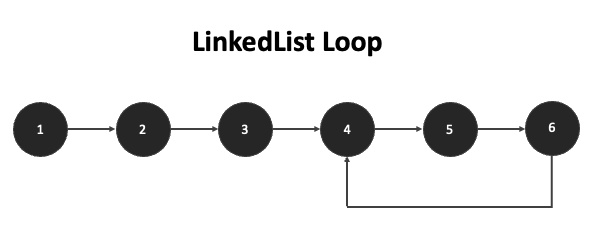


<div class="alert alert-block alert-info">
<b>Q5.1 Response Here - Explanation</b>

I first had to create a new method that made a loop of my current list that pointed to a specific index provided as an input (just to initialize the problem). Then, checking for a loop in the list is as easy as counting until you get to the last element (using the __size attribute to know how many nodes to loop over) and then checking if the final node in the list points to None (as it should be for a non-looping list) or points to some other object (if the list contains a loop). Then I return True or False based on the detection. False means a loop was not detected and True means a loop was detected.

<div>

In [58]:
#you have only a head pointer in the linked list, you dont have a tail pointer.
# add methods if needed.
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        self.__size = 0

    def __str__(self):
        cur = self.head
        out = f"{cur.data}->"
        count = 0
        while cur != None and count < self.__size:
            out += "{}->".format(cur.next.data) if cur.next != None else "None"
            cur  = cur.next
            count += 1
        # out += "None"
        return out

    def __len__(self):
        return self.__size

    def push(self, data):
        new_node      = Node(data)
        new_node.next = self.head
        if self.head == None:
            self.tail = new_node
        self.head     = new_node
        self.__size  += 1

    def make_loop(self, index):
        cur = self.head
        count = 0
        while cur != None:
            if count == index:
                node_to_loop = cur
            if count == self.__size-1:
                cur.next = node_to_loop
                cur = None
            else:
                cur = cur.next
            count += 1

    def detect_loop(self):
        cur = self.head
        count = 0
        while count < self.__size:
            if count == self.__size-1:
                if cur.next == None:
                    return False
                else:
                    return True
            count += 1
            cur = cur.next

In [59]:
# Create test list

test_list = LinkedList()
test_list.push(5)
test_list.push(4)
test_list.push(3)
test_list.push(2)
test_list.push(1)
print(test_list)
print(test_list.detect_loop())
test_list.make_loop(2)
print(test_list)
print(test_list.detect_loop())

1->2->3->4->5->None
False
1->2->3->4->5->3->
True


##Q6 (1 pts) Extra  - Subarray Sort


Write a function that takes in an array of at least two integers and that returns an array of the starting and ending indices of the smallest subarray in the input array that needs to be sorted in place in order for the entire input array to be sorted (in ascending order).
If the input array is already sorted, the function should return
[-1, -1].

**Sample Input**

array = [1, 2, 4, 7, 10, 11, 7, 12, 6, 7, 16, 18, 19]


**Sample Output**

[3,9]

**Hints**
* Realize that even a single out-of-order number in the input array can call for a large subarray to have to be sorted. This is because, depending on how out-of-place the number is, it might need to be moved very far away from its original position in order to be in its sorted position.
* Find the smallest and largest numbers that are out of order in the input array. You should be able to do this in a single pass through the array.
* Once you've found the smallest and largest out-of-order numbers mentioned in Hint #2, find their final sorted positions in the array. This should give you the extremities of the smallest subarray that needs to be sorted.

In [67]:
# I don't understand the hint, but what makes sense to me is to first sort the array and then find the bounds of the internal array where the matching pattern is broken
def subarraySort(array):
    sorted_array = sorted(array)
    indices = [i for i in range(len(array))]
    matches = [False] * len(array)
    for i, val in enumerate(sorted_array):
        if array[i] == val:
            matches[i] = True
    # print(matches)
    non_match_idx = []
    for i, val in enumerate(matches):
        if val == False:
            non_match_idx.append(i)
    if len(non_match_idx) == 0:
        return [-1, -1]
    else:
        return [non_match_idx[0], non_match_idx[-1]]

print(f'Testing array [1, 2, 4, 7, 10, 11, 7, 12, 6, 7, 16, 18, 19]:' + str(subarraySort([1, 2, 4, 7, 10, 11, 7, 12, 6, 7, 16, 18, 19])))
print(f'Testing array [1, 2, 3, 4, 5, 6, 7, 8, 9]                  :' + str(subarraySort([1, 2, 3, 4, 5, 6, 7, 8, 9])))

Testing array [1, 2, 4, 7, 10, 11, 7, 12, 6, 7, 16, 18, 19]:[3, 9]
Testing array [1, 2, 3, 4, 5, 6, 7, 8, 9]                  :[-1, -1]
